
Select an option to visualize student data:
1. Visualize proportion of students based on race
2. Compare average writing scores among different race groups
3. Visualize reading and writing scores for a specific student ID
4. Visualize attendance, failures, and absences for a specific student ID
5. Exit


Enter your choice (1-5):  4
Enter the student ID to visualize their scores:  ID-3523


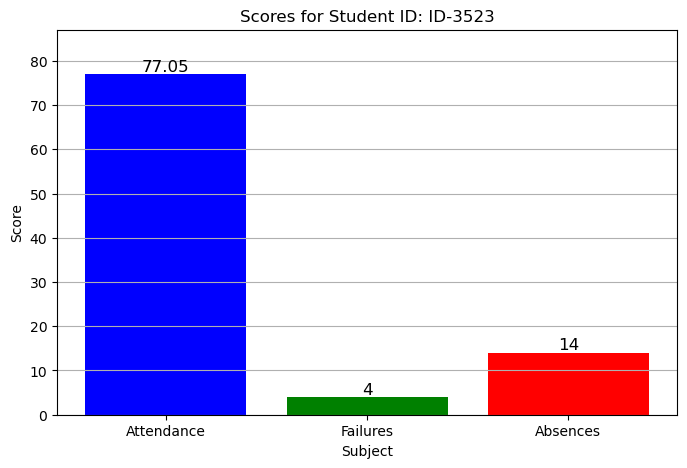


Select an option to visualize student data:
1. Visualize proportion of students based on race
2. Compare average writing scores among different race groups
3. Visualize reading and writing scores for a specific student ID
4. Visualize attendance, failures, and absences for a specific student ID
5. Exit


Enter your choice (1-5):  5


Exiting the program.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'students_data.csv'
students_data = pd.read_csv(file_path)

def option_1():
    # Ask user to input a race
    input_race = input("Enter the race you want to visualize: ").strip()

    # Check if the input race is in the dataset
    if input_race in students_data['Race'].unique():
        # Filter data based on the input race
        filtered_data = students_data[students_data['Race'] == input_race]
        
        # Count the number of students in the specified race and others
        race_counts = pd.Series({
            input_race: len(filtered_data),
            'Others': len(students_data) - len(filtered_data)
        })

        # Plot the race distribution as a pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f'Proportion of Students in Given Race: {input_race} vs. Combine race')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.show()
    else:
        print("The race you entered is not found in the dataset. Please try again.")

def option_2():
    # Ask the user to input a minimum writing score
    min_writing_score = float(input("Enter the minimum average writing score you want to input: "))

    # Filter the data based on the minimum writing score
    filtered_data = students_data[students_data['Writing_score'] >= min_writing_score]

    # Calculate the average writing scores for each race group after filtering
    average_writing_scores = filtered_data.groupby('Race')['Writing_score'].mean()

    # Calculate the percentage of each race group's average writing score relative to the total average
    total_avg_score = average_writing_scores.mean()
    percentages = (average_writing_scores / total_avg_score) * 100

    # Plot the average writing scores as a bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(average_writing_scores.index, average_writing_scores, color='skyblue', edgecolor='black')

    # Annotate each bar with the corresponding percentage
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
                 ha='center', va='bottom')

    plt.title('Average Writing Scores by Race')
    plt.xlabel('Race')
    plt.ylabel('Average Writing Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def option_3():
    # Prompt the user to input a student ID
    input_id = input("Enter the student ID to visualize their scores: ").strip()

    # Check if the input ID is in the dataset
    if input_id in students_data['ID'].astype(str).values:
        # Filter the data for the specific student ID
        student_data = students_data[students_data['ID'].astype(str) == input_id]
        
        # Extract reading and writing scores for the specific student
        reading_score = student_data['Reading_score'].values[0]
        writing_score = student_data['Writing_score'].values[0]
        
        # Create a line plot for the reading and writing scores
        plt.figure(figsize=(8, 5))
        plt.plot(['Reading Score', 'Writing Score'], [reading_score, writing_score], marker='o', linestyle='-', color='blue')
        
        # Annotate the scores on the plot
        plt.text(0, reading_score, f'{reading_score}', ha='center', va='bottom', fontsize=12)
        plt.text(1, writing_score, f'{writing_score}', ha='center', va='bottom', fontsize=12)
        
        # Set plot title and labels
        plt.title(f'Scores Comparison for Student ID: {input_id}')
        plt.xlabel('Score Type')
        plt.ylabel('Score Value')
        plt.ylim(0, max(reading_score, writing_score) + 10)  # Adjust y-axis limit
        plt.grid(True)
        
        # Display the plot
        plt.show()
    else:
        print("The student ID you entered is not found in the dataset. Please try again.")

def option_4():
    # Prompt the user to input a student ID
    input_id = input("Enter the student ID to visualize their scores: ").strip()

    # Check if the input ID is in the dataset
    if input_id in students_data['ID'].astype(str).values:
        # Filter the data for the specific student ID
        student_data = students_data[students_data['ID'].astype(str) == input_id]
        
        # Extract attendance, failures, and absences scores for the specific student
        attendance_rate = student_data['Attendance_rate'].values[0]
        failures = student_data['Failures'].values[0]
        absences = student_data['Absences'].values[0]
        
        # Prepare data for plotting
        subjects = ['Attendance', 'Failures', 'Absences']
        scores = [attendance_rate, failures, absences]
        
        # Create a bar chart
        plt.figure(figsize=(8, 5))
        bars = plt.bar(subjects, scores, color=['blue', 'green', 'red'])
        
        # Annotate the scores on the bars
        for bar, score in zip(bars, scores):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score}', 
                     ha='center', va='bottom', fontsize=12)
        
        # Set plot title and labels
        plt.title(f'Scores for Student ID: {input_id}')
        plt.xlabel('Subject')
        plt.ylabel('Score')
        plt.ylim(0, max(scores) + 10)  # Adjust y-axis limit
        plt.grid(True, axis='y')
        
        # Display the plot
        plt.show()
    else:
        print("The student ID you entered is not found in the dataset. Please try again.")

def main():
    while True:
        print("\nSelect an option to visualize student data:")
        print("1. Visualize proportion of students based on race")
        print("2. Compare average writing scores among different race groups")
        print("3. Visualize reading and writing scores for a specific student ID")
        print("4. Visualize attendance, failures, and absences for a specific student ID")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ").strip()

        if choice == '1':
            option_1()
        elif choice == '2':
            option_2()
        elif choice == '3':
            option_3()
        elif choice == '4':
            option_4()
        elif choice == '5':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

# Run the main function
main()
